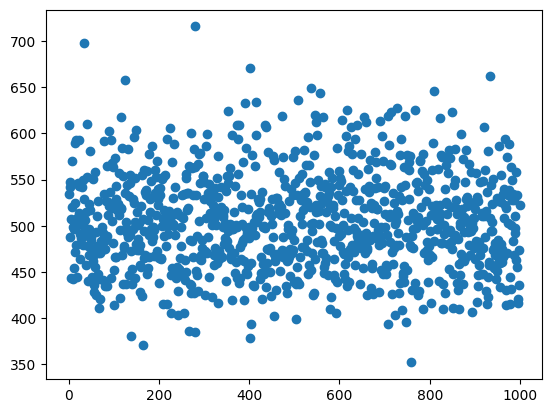

In [18]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

x = np.array([np.random.lognormal(0.5,0.1) for i in range(1000)])
y = np.array([np.random.normal(np.log(500),0.1) for i in range(1000)])

plt.scatter(np.arange(1000),np.exp(y))